# Heart Disease Xboost

Cargamos los datos

In [1]:
import pandas as pd
ds_path = "data/HeartDiseaseTrain-Test.csv"
df = pd.read_csv(ds_path)


In [2]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


Exploramos los datos

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  thalassemia                    1025 non-null   o

Se observan tipos de datos que pueden ser ajustados

Observamos los valores unicos de las variables categóricas

In [4]:
from utils import convert_bolean_columns
convert_bolean_columns(df)
df["sex"] = df["sex"].astype("category")
df["chest_pain_type"] = df["chest_pain_type"].astype("category")
df['fasting_blood_sugar'] = df['fasting_blood_sugar'].astype("category")
df['rest_ecg'] = df['rest_ecg'].astype("category")
df['slope'] = df['slope'].astype("category")
df['vessels_colored_by_flourosopy'] = df['vessels_colored_by_flourosopy'].map({"Zero": "0", "Two": "2", "Three": "3", "One": "1", "Four": "4"})
df['vessels_colored_by_flourosopy'] = df['vessels_colored_by_flourosopy'].astype("int64")
df['thalassemia'] = df['thalassemia'].astype("category")
from utils import get_categoric_columns
categoric_columns = get_categoric_columns(df)
for i in categoric_columns:
    print(i)
    print(df[i].unique())

sex
['Male', 'Female']
Categories (2, object): ['Female', 'Male']
chest_pain_type
['Typical angina', 'Atypical angina', 'Non-anginal pain', 'Asymptomatic']
Categories (4, object): ['Asymptomatic', 'Atypical angina', 'Non-anginal pain', 'Typical angina']
fasting_blood_sugar
['Lower than 120 mg/ml', 'Greater than 120 mg/ml']
Categories (2, object): ['Greater than 120 mg/ml', 'Lower than 120 mg/ml']
rest_ecg
['ST-T wave abnormality', 'Normal', 'Left ventricular hypertrophy']
Categories (3, object): ['Left ventricular hypertrophy', 'Normal', 'ST-T wave abnormality']
slope
['Downsloping', 'Upsloping', 'Flat']
Categories (3, object): ['Downsloping', 'Flat', 'Upsloping']
thalassemia
['Reversable Defect', 'Fixed Defect', 'Normal', 'No']
Categories (4, object): ['Fixed Defect', 'No', 'Normal', 'Reversable Defect']


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   age                            1025 non-null   int64   
 1   sex                            1025 non-null   category
 2   chest_pain_type                1025 non-null   category
 3   resting_blood_pressure         1025 non-null   int64   
 4   cholestoral                    1025 non-null   int64   
 5   fasting_blood_sugar            1025 non-null   category
 6   rest_ecg                       1025 non-null   category
 7   Max_heart_rate                 1025 non-null   int64   
 8   exercise_induced_angina        1025 non-null   bool    
 9   oldpeak                        1025 non-null   float64 
 10  slope                          1025 non-null   category
 11  vessels_colored_by_flourosopy  1025 non-null   int64   
 12  thalassemia                    102

Aunque es inusual tener la columna edad cómo float, lo manetenemos así, para no perder información

Continuamos con la exploración de los datos

Visualizamos la cabecera, luego las últimas entradas

In [6]:
df.tail(10)

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
1015,58,Male,Typical angina,128,216,Lower than 120 mg/ml,Normal,131,True,2.2,Flat,3,Reversable Defect,False
1016,65,Male,Asymptomatic,138,282,Greater than 120 mg/ml,Normal,174,False,1.4,Flat,1,Fixed Defect,False
1017,53,Male,Typical angina,123,282,Lower than 120 mg/ml,ST-T wave abnormality,95,True,2.0,Flat,2,Reversable Defect,False
1018,41,Male,Typical angina,110,172,Lower than 120 mg/ml,Normal,158,False,0.0,Downsloping,0,Reversable Defect,False
1019,47,Male,Typical angina,112,204,Lower than 120 mg/ml,ST-T wave abnormality,143,False,0.1,Downsloping,0,Fixed Defect,True
1020,59,Male,Atypical angina,140,221,Lower than 120 mg/ml,ST-T wave abnormality,164,True,0.0,Downsloping,0,Fixed Defect,True
1021,60,Male,Typical angina,125,258,Lower than 120 mg/ml,Normal,141,True,2.8,Flat,1,Reversable Defect,False
1022,47,Male,Typical angina,110,275,Lower than 120 mg/ml,Normal,118,True,1.0,Flat,1,Fixed Defect,False
1023,50,Female,Typical angina,110,254,Lower than 120 mg/ml,Normal,159,False,0.0,Downsloping,0,Fixed Defect,True
1024,54,Male,Typical angina,120,188,Lower than 120 mg/ml,ST-T wave abnormality,113,False,1.4,Flat,1,Reversable Defect,False


Verificamos los valores descriptivos

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
resting_blood_pressure,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
cholestoral,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
Max_heart_rate,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2
vessels_colored_by_flourosopy,1025.0,0.754146,1.030798,0.0,0.0,0.0,1.0,4.0


In [8]:
df.describe(include='category').T

,count,unique,top,freq
sex,1025,2,Male,713
chest_pain_type,1025,4,Typical angina,497
fasting_blood_sugar,1025,2,Lower than 120 mg/ml,872
rest_ecg,1025,3,ST-T wave abnormality,513
slope,1025,3,Flat,482
thalassemia,1025,4,Fixed Defect,544


In [9]:
df.describe(include='boolean').T

,count,unique,top,freq
exercise_induced_angina,1025,2,False,680
target,1025,2,True,526


## Identificación de valores nulos y outliers

Ahora valores nulos

In [10]:
from utils import get_nulll_data_info
get_nulll_data_info(df)

,datos sin NAs en q,Na en q,Na en %
age,1025,0,0.0
sex,1025,0,0.0
chest_pain_type,1025,0,0.0
resting_blood_pressure,1025,0,0.0
cholestoral,1025,0,0.0
fasting_blood_sugar,1025,0,0.0
rest_ecg,1025,0,0.0
Max_heart_rate,1025,0,0.0
exercise_induced_angina,1025,0,0.0
oldpeak,1025,0,0.0


No existen valores nulos

Ahora verificamos los outliers

In [11]:
from utils import get_outliers_data
get_outliers_data(df)

,age,resting_blood_pressure,cholestoral,Max_heart_rate,oldpeak,vessels_colored_by_flourosopy
N° Outliers,0.0,30.000000,16.000000,4.000000,7.000000,87.000000
% Outliers,0.0,2.926829,1.560976,0.390244,0.682927,8.487805
Lim. mix,28.5,90.000000,115.000000,81.000000,-2.700000,-1.500000
Lim. max,80.5,170.000000,371.000000,217.000000,4.500000,2.500000


Visualizamos las gráficas de cajas de nuestras columnas

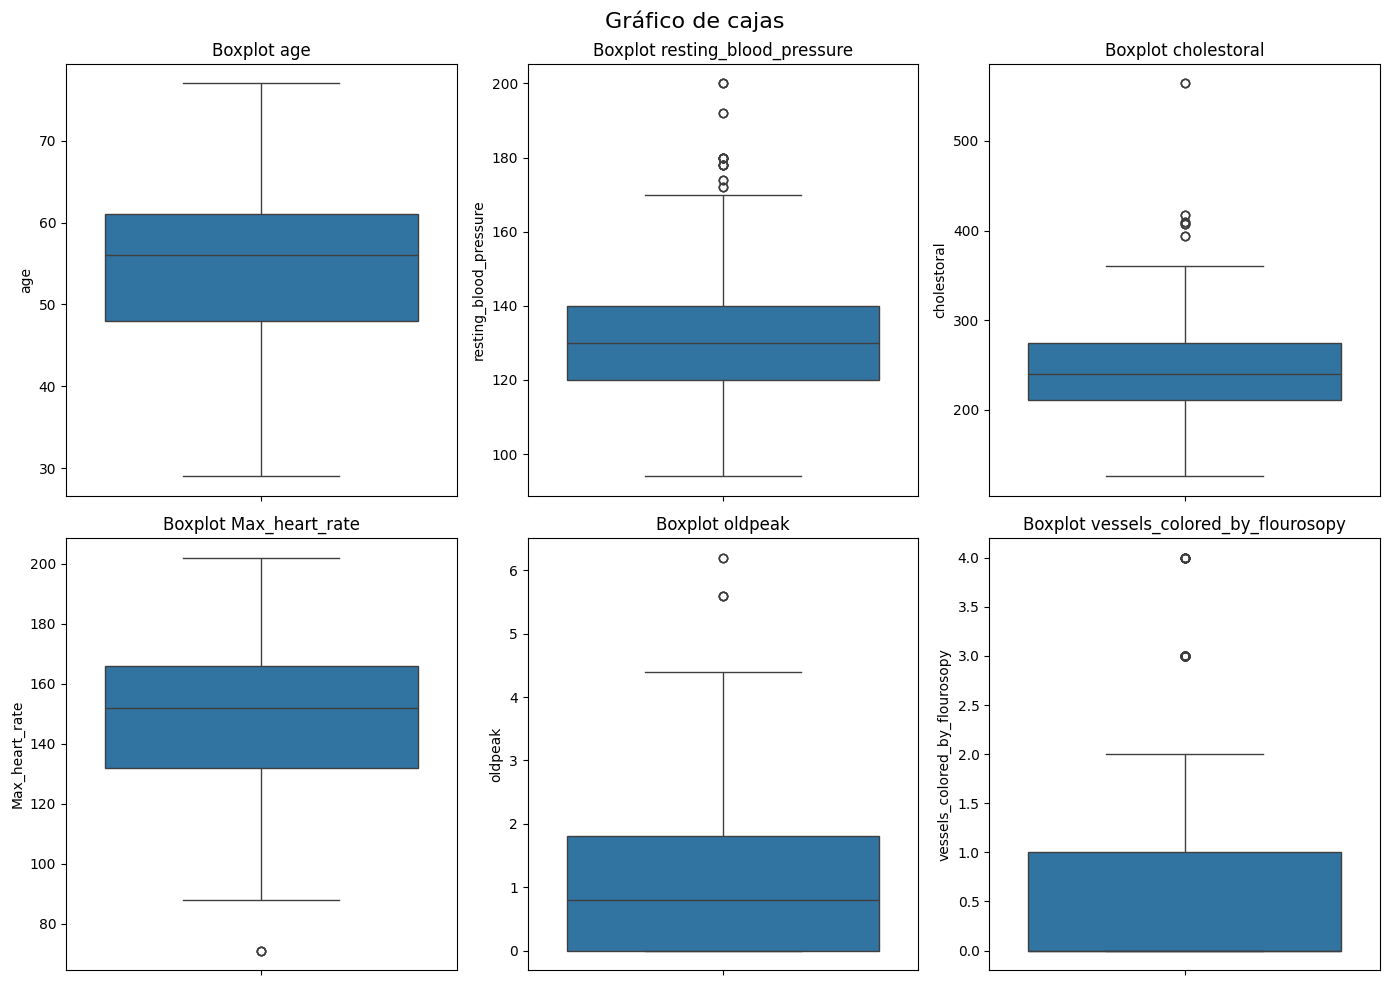

In [12]:
from utils import graph_boxplot, get_numeric_columns
graph_boxplot(df, columns=get_numeric_columns(df))

Observamos outliers en las columnas resting blood pressure, cholesterol, oldpeak, max heart rate

En el Pico de depresión del segmento ST se observa valores de elevación, lo cual es posible

Ahora veremos las caracteristicas descriptivas de las variables númericas

In [13]:
df.describe()

,age,resting_blood_pressure,cholestoral,Max_heart_rate,oldpeak,vessels_colored_by_flourosopy
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512,0.754146
std,9.072290,17.516718,51.59251,23.005724,1.175053,1.030798
min,29.000000,94.000000,126.00000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000,0.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000,0.000000
75%,61.000000,140.000000,275.00000,166.000000,1.800000,1.000000
max,77.000000,200.000000,564.00000,202.000000,6.200000,4.000000


In [14]:
from utils import get_descriptive_statistics
get_descriptive_statistics(df)

,age,resting_blood_pressure,cholestoral,Max_heart_rate,oldpeak,vessels_colored_by_flourosopy
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,4.000000
mean,54.434146,131.611707,246.000000,149.114146,1.071512,0.754146
std,9.072290,17.516718,51.592510,23.005724,1.175053,1.030798
median,56.000000,130.000000,240.000000,152.000000,0.800000,0.000000
variation_coefficient,0.166665,0.133094,0.209726,0.154283,1.096631,1.366840


Ahora visualizaremos los histogramas de las diferentes columnas numéricas para entender mejor la distribución

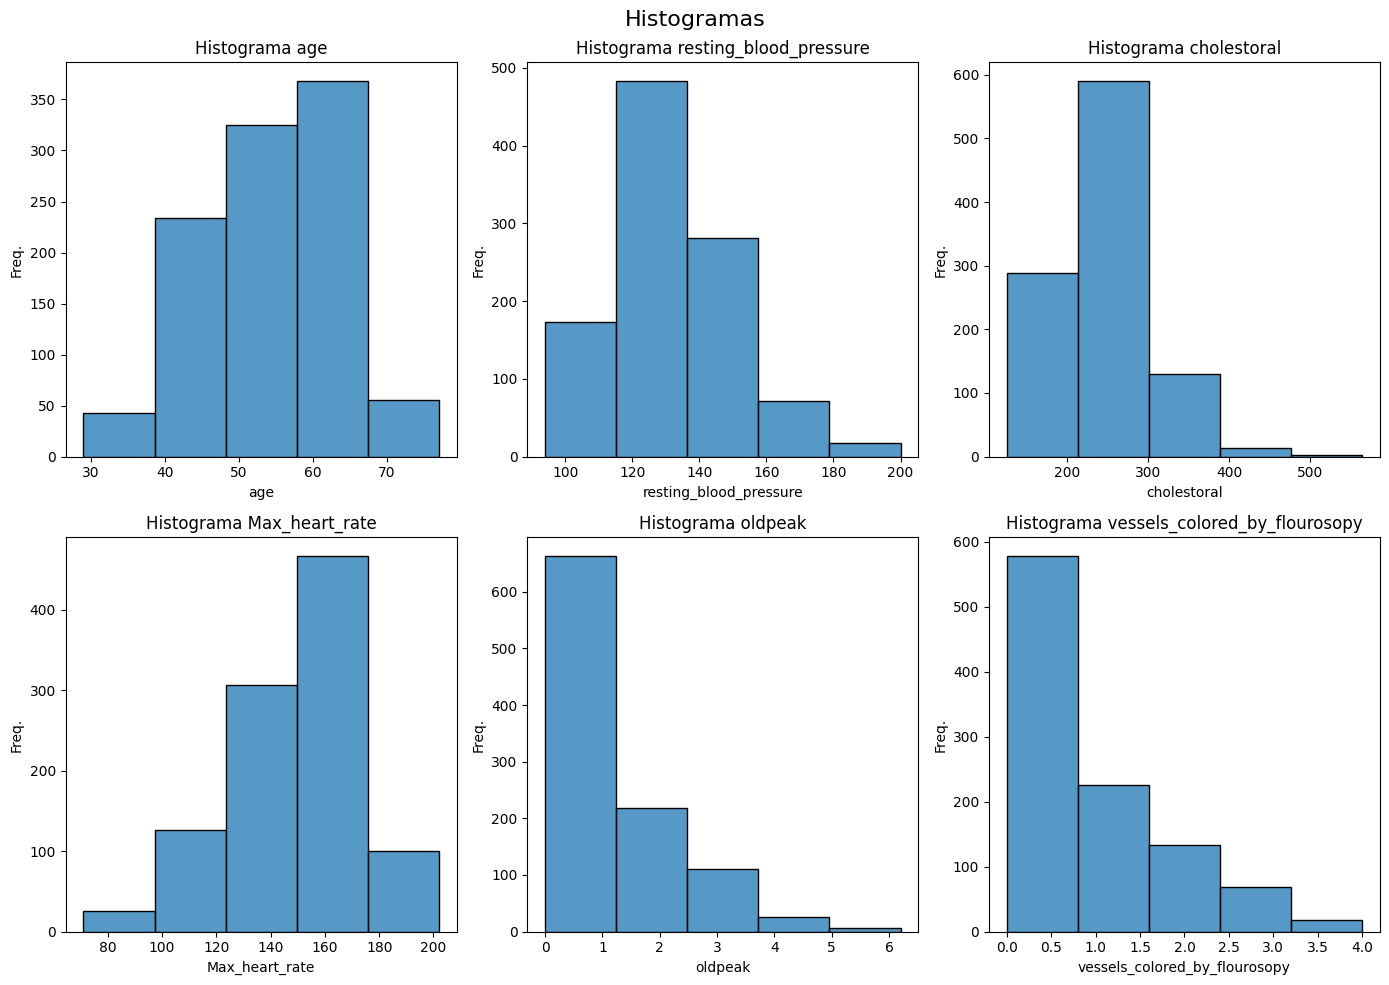

In [15]:
from utils import graph_histogram
graph_histogram(df, get_numeric_columns(df))

No se observa nada fuera de lo normal en las distribuciones

Se aprecia que la columna age, resting blood, colesterol posee una distribución normal, así como la columna max heart rate.

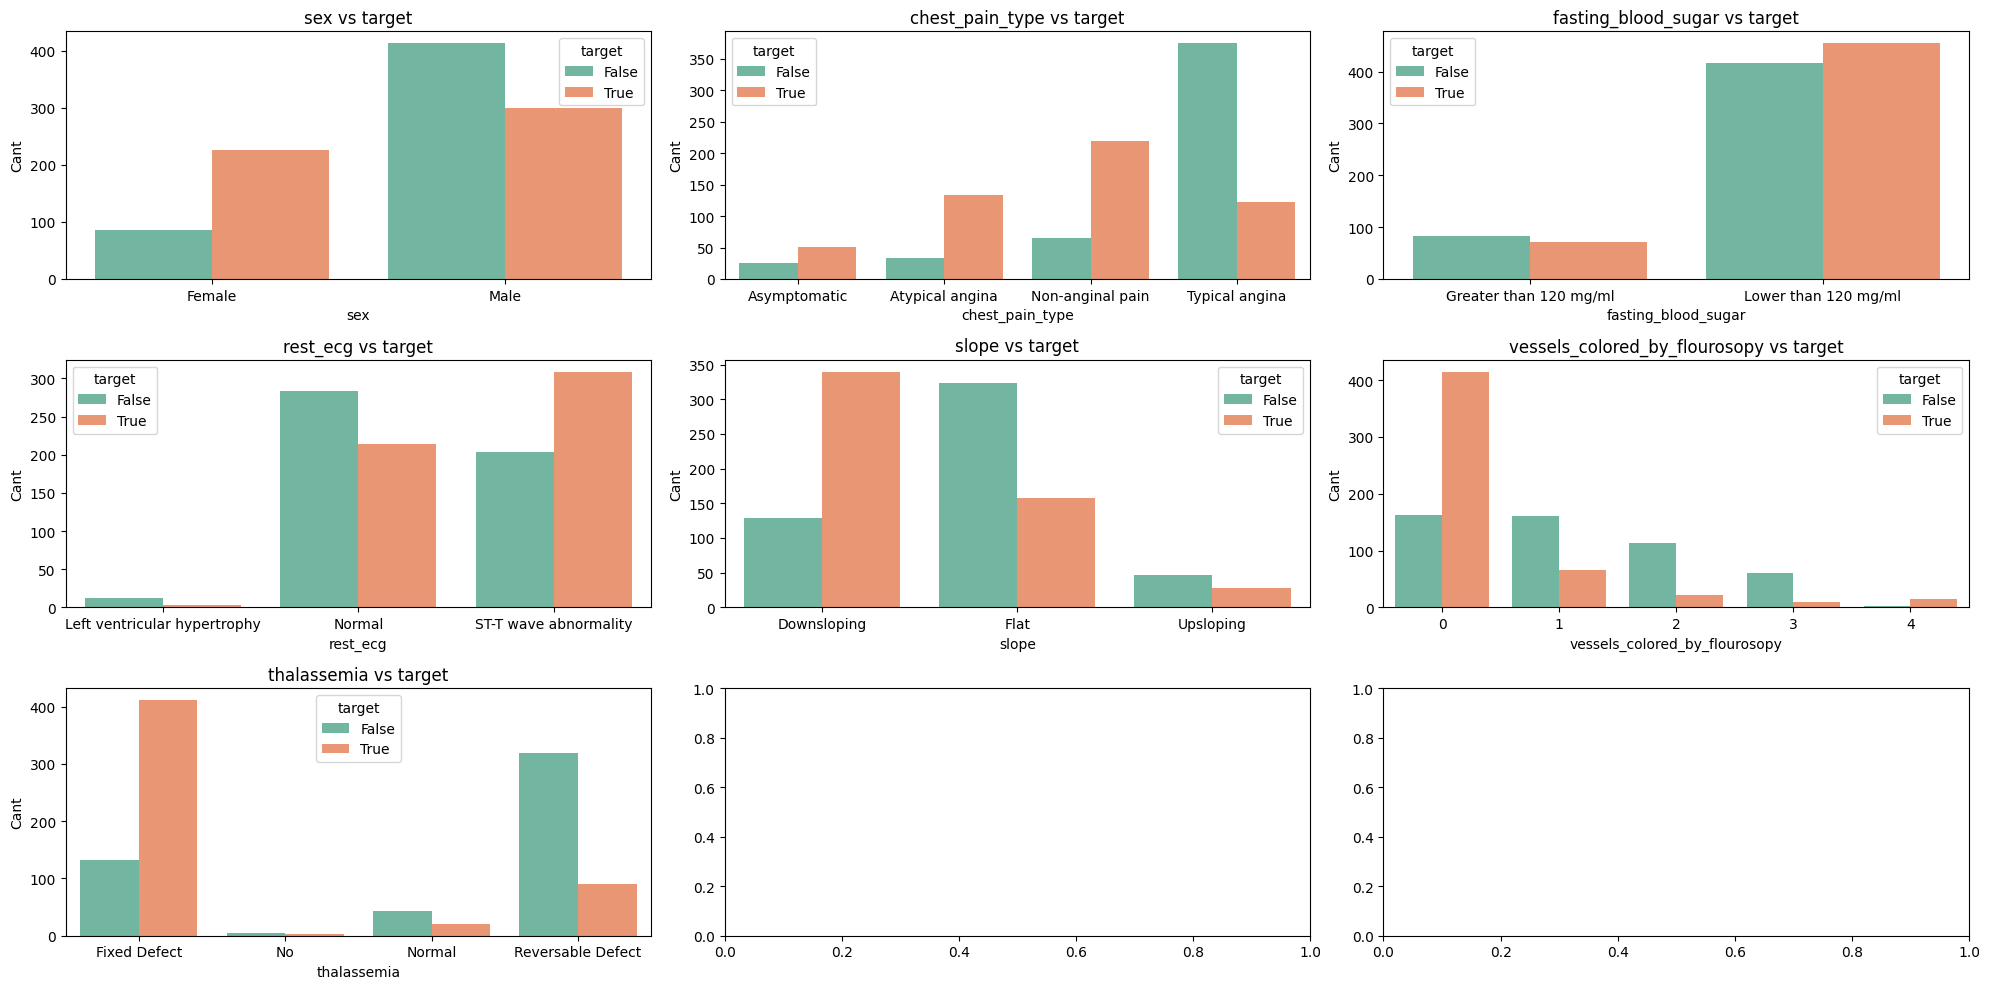

In [16]:
from utils import graph_barplot
graph_barplot(df, ["sex", "chest_pain_type", "fasting_blood_sugar", "rest_ecg", "slope", "vessels_colored_by_flourosopy", "thalassemia"],'target', num_columns=3, figsize=(20,10))

Observamos que tenemos datos desbalanceados para las columnas

Veremos las correlaciones entre las caracteristicas

In [17]:
from utils import get_numeric_columns
numeric_columns = get_numeric_columns(df)
corr_matrix = df[numeric_columns].corr(method="pearson")
spearmann = df[numeric_columns].corr(method="spearman")
kendall = df[numeric_columns].corr(method="kendall")
corr_matrix

,age,resting_blood_pressure,cholestoral,Max_heart_rate,oldpeak,vessels_colored_by_flourosopy
age,1.000000,0.271121,0.219823,-0.390227,0.208137,0.271551
resting_blood_pressure,0.271121,1.000000,0.127977,-0.039264,0.187434,0.104554
cholestoral,0.219823,0.127977,1.000000,-0.021772,0.064880,0.074259
Max_heart_rate,-0.390227,-0.039264,-0.021772,1.000000,-0.349796,-0.207888
oldpeak,0.208137,0.187434,0.064880,-0.349796,1.000000,0.221816
vessels_colored_by_flourosopy,0.271551,0.104554,0.074259,-0.207888,0.221816,1.000000


Ahora graficamos el mapa de calor de las correlaciones

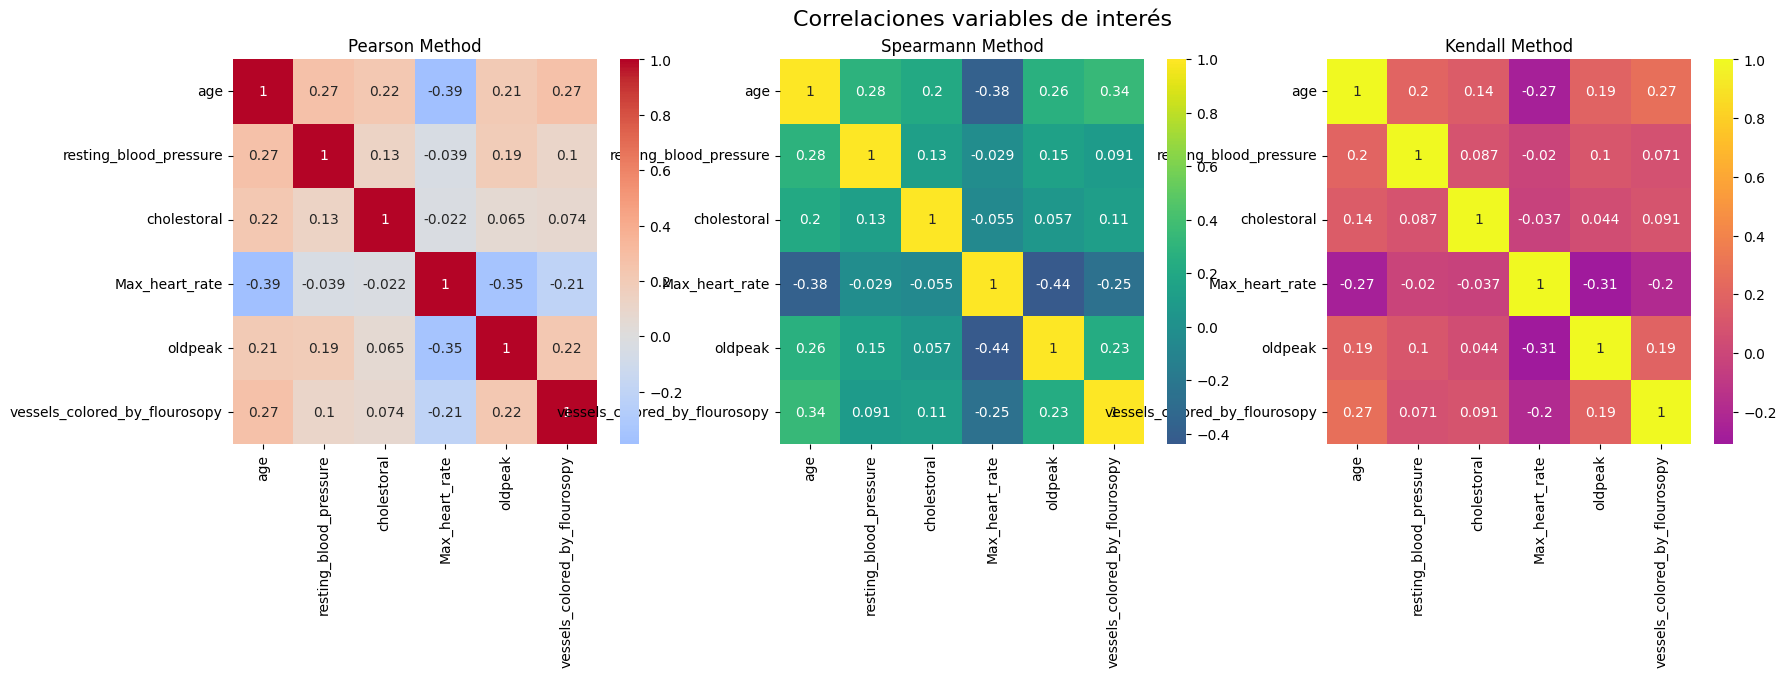

In [18]:
from utils import graph_correlations
graph_correlations(corr_matrix, spearmann, kendall, "Correlaciones variables de interés", figsize= (20,5))

No se observan fuertes correlaciones entre las variables

Se observan ligeras correlaciones entre:
- resting blood pressure y oldpeak
- cholesterol y age
- resting blood pressure y age

Ahora observaremos la dispersión entre las variables

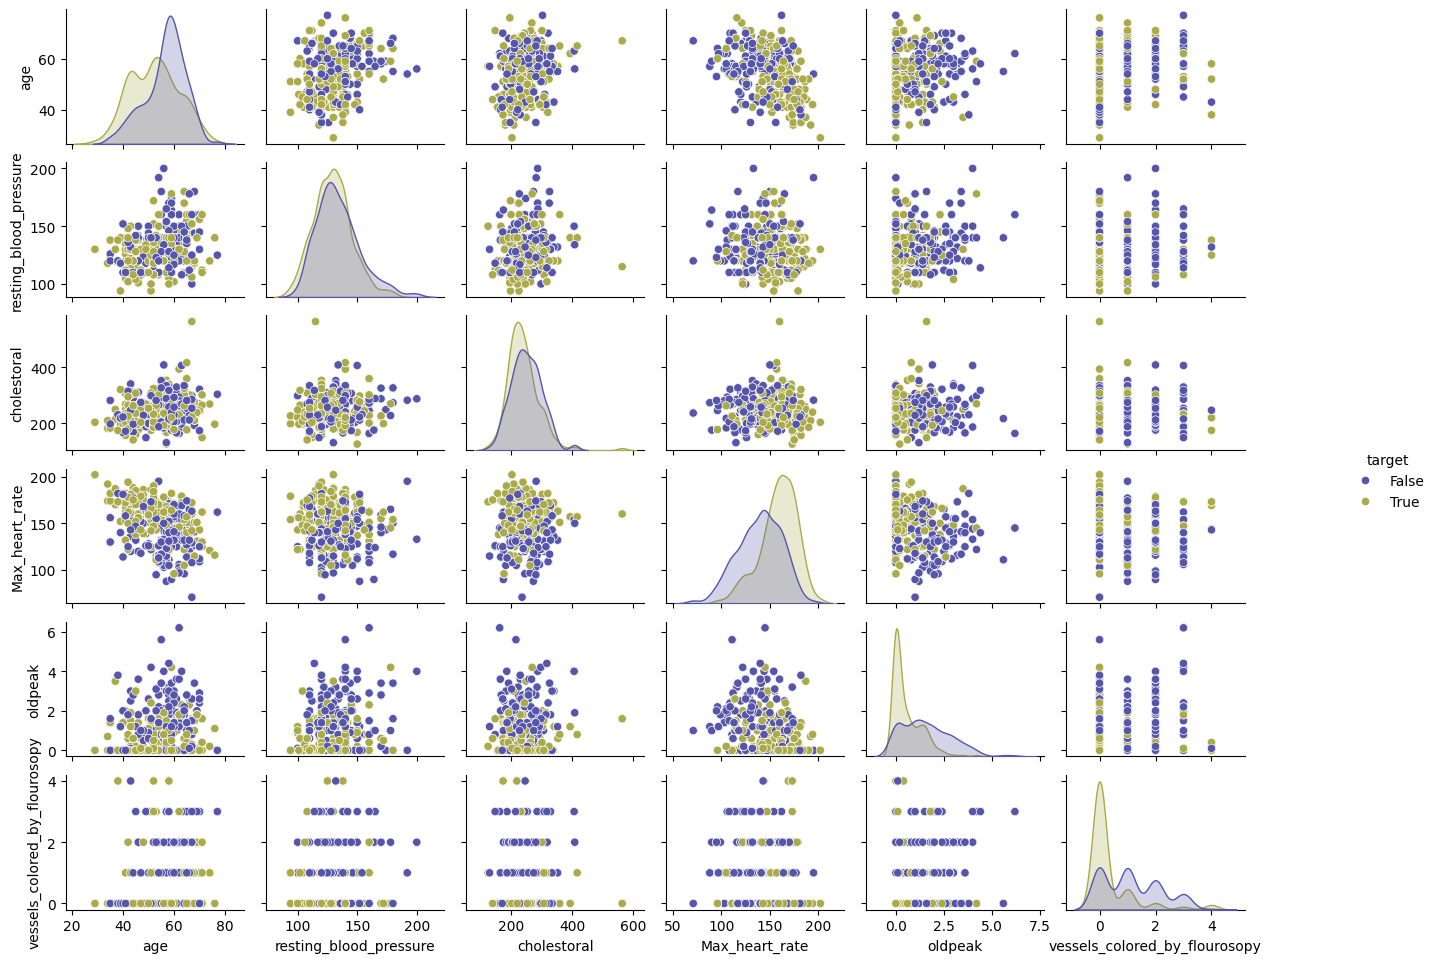

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
numeric_columns = get_numeric_columns(df)
palette = sns.color_palette("gist_stern", n_colors=2)
g = sns.pairplot(df[[*numeric_columns] + ["target"]], hue='target', height=1.2, diag_kind = 'kde', palette=palette)
g.figure.set_size_inches(15, 10)
plt.show()

Iniciamos la preparación de datos

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   age                            1025 non-null   int64   
 1   sex                            1025 non-null   category
 2   chest_pain_type                1025 non-null   category
 3   resting_blood_pressure         1025 non-null   int64   
 4   cholestoral                    1025 non-null   int64   
 5   fasting_blood_sugar            1025 non-null   category
 6   rest_ecg                       1025 non-null   category
 7   Max_heart_rate                 1025 non-null   int64   
 8   exercise_induced_angina        1025 non-null   bool    
 9   oldpeak                        1025 non-null   float64 
 10  slope                          1025 non-null   category
 11  vessels_colored_by_flourosopy  1025 non-null   int64   
 12  thalassemia                    102

In [21]:
predict_numeric = [
    'age',
    'resting_blood_pressure',
    'cholestoral',
    'Max_heart_rate',
    'oldpeak',
    "vessels_colored_by_flourosopy",
]

predict_categoric = [
    "sex",
    "chest_pain_type",
    "fasting_blood_sugar",
    "rest_ecg",
    "slope",
    "thalassemia",
]

predict_boolean = [
    "exercise_induced_angina",
]

output = "target"


X = df[[*predict_numeric] + [*predict_categoric] + [*predict_boolean]]
y = df[output]

Preparamos el preprocesador y asignamos el Encoder OneHOT

In [22]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
ordinal_columns = [
    "vessels_colored_by_flourosopy",
]
standard_columns = [
    'age',
    'resting_blood_pressure',
    'cholestoral',
    'Max_heart_rate',
    'oldpeak',
]
scaler = Pipeline(steps=[
    ("scaler", StandardScaler())
])
ordinal = Pipeline(steps=[
    ("ordinal", OrdinalEncoder())
])
onehot = Pipeline(steps=[
("onehot", OneHotEncoder(handle_unknown='ignore', sparse_output=False))])
preprocessor = ColumnTransformer(
    transformers=[
        (
            "scaler",
            scaler,
            standard_columns,
        ),
                (
            "ordinal",
            ordinal,
            ordinal_columns,
        ),
        (
            "onehot",
            onehot,
            predict_categoric,
        ),
    ],
    remainder="passthrough"
)

Dividimos el dataset en 70% para entrenamiento, 30% para pruebas

In [23]:
X_transf = preprocessor.fit_transform(X)

df_transf = pd.DataFrame(X_transf, columns=preprocessor.get_feature_names_out())

df_transf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 25 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   scaler__age                                         1025 non-null   float64
 1   scaler__resting_blood_pressure                      1025 non-null   float64
 2   scaler__cholestoral                                 1025 non-null   float64
 3   scaler__Max_heart_rate                              1025 non-null   float64
 4   scaler__oldpeak                                     1025 non-null   float64
 5   ordinal__vessels_colored_by_flourosopy              1025 non-null   float64
 6   onehot__sex_Female                                  1025 non-null   float64
 7   onehot__sex_Male                                    1025 non-null   float64
 8   onehot__chest_pain_type_Asymptomatic                1025 non-null   float64
 9

In [24]:
get_nulll_data_info(df_transf)

,datos sin NAs en q,Na en q,Na en %
scaler__age,1025,0,0.0
scaler__resting_blood_pressure,1025,0,0.0
scaler__cholestoral,1025,0,0.0
scaler__Max_heart_rate,1025,0,0.0
scaler__oldpeak,1025,0,0.0
ordinal__vessels_colored_by_flourosopy,1025,0,0.0
onehot__sex_Female,1025,0,0.0
onehot__sex_Male,1025,0,0.0
onehot__chest_pain_type_Asymptomatic,1025,0,0.0
onehot__chest_pain_type_Atypical angina,1025,0,0.0


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42,
)

In [26]:
del X_transf
del df_transf


## Creamos y entrenamos los modelos

### XBoost

In [27]:
import xgboost as xgb
from sklearn.pipeline import Pipeline

pipeline_xb = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", xgb.XGBClassifier(eval_metric='logloss', random_state=42))
])

pipeline_xb.fit(X_train, y_train)

/home/benja/.pyenv/versions/3.12.3/lib/python3.12/site-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age',
                                                   'resting_blood_pressure',
                                                   'cholestoral',
                                                   'Max_heart_rate',
                                                   'oldpeak']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['vessels_colored_by_flourosopy']),
                                                 ('onehot',
                                                  Pipeline(steps=[('onehot',
                                                                   On...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

## Evaluamos los modelos

### XBoost

In [28]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred_xb = pipeline_xb.predict(X_test)

classification_report_xb = classification_report(y_test, y_pred_xb)
conf_matrix_xb = confusion_matrix(y_test, y_pred_xb)
print("Repote Clasificación Árbol de XBoost")
print(classification_report_xb)

Repote Clasificación Árbol de XBoost
              precision    recall  f1-score   support

       False       0.98      1.00      0.99       159
        True       1.00      0.98      0.99       149

    accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308



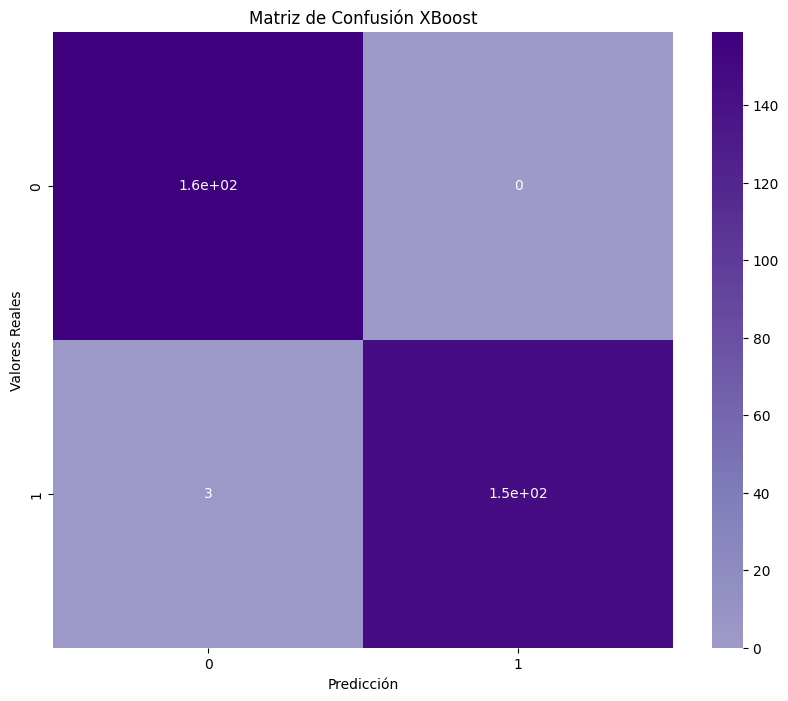

In [29]:
_, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(10,8))
sns.heatmap(
    conf_matrix_xb,
    annot=True,
    cmap='Purples',
    center=0,
    ax=ax1,
)

ax1.set_xlabel("Predicción")
ax1.set_ylabel("Valores Reales")
ax1.set_xticks(ticks=ax1.get_xticks())
ax1.set_yticks(ticks=ax1.get_yticks())
plt.title("Matriz de Confusión XBoost")
plt.show()

EL modelo tiene una respuesta excelente

Utilizamos Gridsearch para optimizar y luego evaluamos con validación cruzada

### XBOOST GridSearch

In [39]:
from sklearn.model_selection import GridSearchCV
pipeline_xb_gscv = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", GridSearchCV(
        xgb.XGBClassifier(eval_metric='logloss', random_state=42),
        param_grid={
            "n_estimators": [100, 200, 300],
            "random_state": [0, 42, 100],
        },
        scoring = 'roc_auc',
        cv=5,
        verbose=2,
        refit=True,
    )),
])

pipeline_xb_gscv.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ...................n_estimators=100, random_state=0; total time=   0.2s
[CV] END ...................n_estimators=100, random_state=0; total time=   0.1s
[CV] END ...................n_estimators=100, random_state=0; total time=   0.1s
[CV] END ...................n_estimators=100, random_state=0; total time=   0.1s
[CV] END ...................n_estimators=100, random_state=0; total time=   0.1s
[CV] END ..................n_estimators=100, random_state=42; total time=   0.2s
[CV] END ..................n_estimators=100, random_state=42; total time=   0.1s
[CV] END ..................n_estimators=100, random_state=42; total time=   0.2s
[CV] END ..................n_estimators=100, random_state=42; total time=   0.4s
[CV] END ..................n_estimators=100, random_state=42; total time=   0.1s
[CV] END .................n_estimators=100, random_state=100; total time=   0.1s
[CV] END .................n_estimators=100, rando

/home/benja/.pyenv/versions/3.12.3/lib/python3.12/site-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age',
                                                   'resting_blood_pressure',
                                                   'cholestoral',
                                                   'Max_heart_rate',
                                                   'oldpeak']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['vessels_colored_by_flourosopy']),
                                                 ('onehot',
                                                  Pipeline(steps=[('onehot',
                                                                   On...
                                                      max_cat_threshold=None,
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=42, ...),
                              param_grid={'n_estimators': [100, 200, 300],
                                          'random_state': [0, 42, 100]},
                              scoring='roc_auc', verbose=2))])

In [40]:
params = pipeline_xb_gscv.steps[-1][1].best_params_

params

{'n_estimators': 100, 'random_state': 0}

In [41]:
from sklearn.model_selection import cross_val_score
score_xb_gscv = cross_val_score(pipeline_xb_gscv, X_train, y_train, cv=5).mean()

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ...................n_estimators=100, random_state=0; total time=   0.4s
[CV] END ...................n_estimators=100, random_state=0; total time=   0.3s
[CV] END ...................n_estimators=100, random_state=0; total time=   0.2s
[CV] END ...................n_estimators=100, random_state=0; total time=   0.2s
[CV] END ...................n_estimators=100, random_state=0; total time=   0.1s
[CV] END ..................n_estimators=100, random_state=42; total time=   0.3s
[CV] END ..................n_estimators=100, random_state=42; total time=   0.4s
[CV] END ..................n_estimators=100, random_state=42; total time=   0.4s
[CV] END ..................n_estimators=100, random_state=42; total time=   0.3s
[CV] END ..................n_estimators=100, random_state=42; total time=   0.3s
[CV] END .................n_estimators=100, random_state=100; total time=   0.3s
[CV] END .................n_estimators=100, rando

In [42]:
print(f"Promedio score XBOOST GridSearchCv: {score_xb_gscv}")

Promedio score XBOOST GridSearchCv: 0.9820515995872034


### Comparamos los rendimientos

In [43]:
y_pred_xb = pipeline_xb_gscv.predict(X_test)
classification_report_xb_gscv = classification_report(y_test, y_pred_xb)
conf_matrix_xb_gscv = confusion_matrix(y_test, y_pred_xb)

Graficamos las matrices confusión

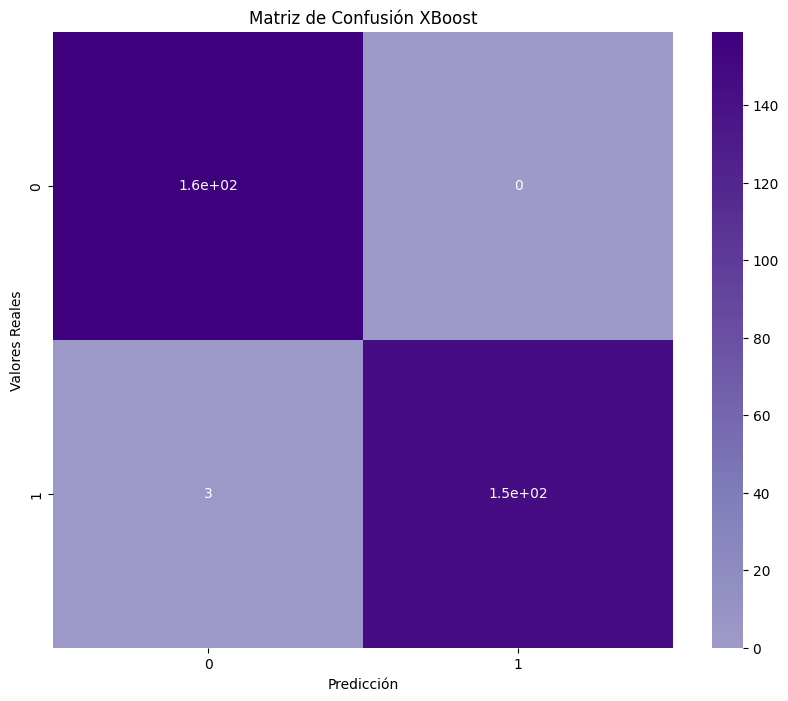

In [44]:
_, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(10,8))
sns.heatmap(
    conf_matrix_xb_gscv,
    annot=True,
    cmap='Purples',
    center=0,
    ax=ax1,
)

ax1.set_xlabel("Predicción")
ax1.set_ylabel("Valores Reales")
ax1.set_xticks(ticks=ax1.get_xticks())
ax1.set_yticks(ticks=ax1.get_yticks())
plt.title("Matriz de Confusión XBoost")
plt.show()

Ahora evaluaremos los valores Presición, F1-Score, Recall y 

In [45]:
# El siguiente fragmento de codigo fue obtenido a traves de ChatGPT, 
# basicamente lo que hace es imprimir en 2 columnas, se utiliza solamente 
# para facil visualizacion de ambas tablas
table1 = classification_report_xb
table2 = classification_report_xb_gscv
table2 = "Modelo Sin optimizar\n" + table2[0:]
table1 = "Modelo GridSearch\n" + table1[0:]
# Split the tables into lines
lines1 = table1.split("\n")
lines2 = table2.split("\n")
# Pad the shorter list to match the length of the longer one
max_lines = max(len(lines1), len(lines2))
lines1.extend([""] * (max_lines - len(lines1)))
lines2.extend([""] * (max_lines - len(lines2)))
# Print the tables side by side
for line1, line2 in zip(lines1, lines2):
    print(f"{line1:<50} {"       "} {line2}")


Modelo GridSearch                                          Modelo Sin optimizar
              precision    recall  f1-score   support                       precision    recall  f1-score   support
                                                           
       False       0.98      1.00      0.99       159                False       0.98      1.00      0.99       159
        True       1.00      0.98      0.99       149                 True       1.00      0.98      0.99       149
                                                           
    accuracy                           0.99       308             accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308            macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308         weighted avg       0.99      0.99      0.99       308
                                                           


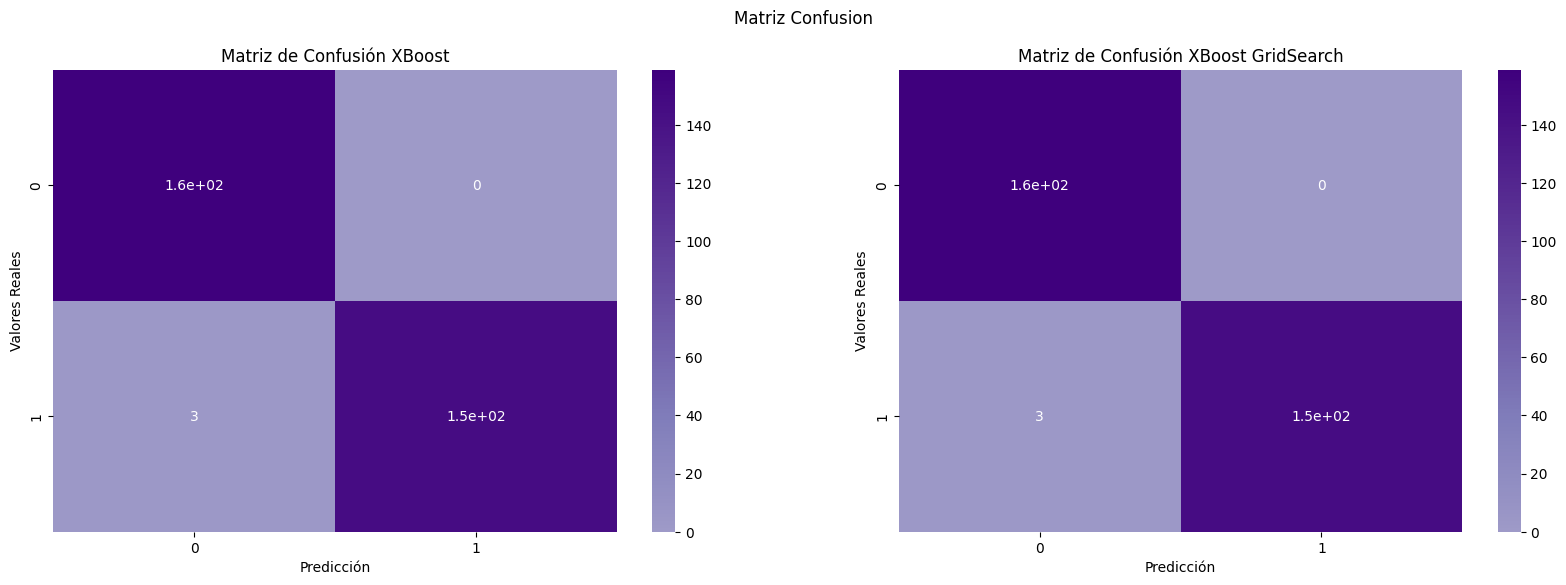

In [37]:
from utils import graph_confusion_comparison
graph_confusion_comparison(conf_matrix_xb, conf_matrix_xb_gscv, "Matriz de Confusión XBoost", "Matriz de Confusión XBoost GridSearch")

Observamos que ambos modelos funcionan de forma excelente, la optimización no afecta al modelo